# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Extraction


Extract 100k from 30 million data (Bitcoin metadata)
-  load data with all data of target variable, 'out_and_tx_malicious' = '1'

In [ ]:
# File paths
file_path = 'C:/Users/Enduser/OneDrive - Asia Pacific University/uni/Y3S2/fyp/data/DG_out.csv'  
output_file = "btc_trial_dataset2.csv"

# set the extraction size
extract_size = 100000  

try:
    # Subset of the dataset
    data = pd.read_csv(file_path)

    # Check if the target column exists
    if 'out_and_tx_malicious' not in data.columns:
        raise ValueError("Column 'out_and_tx_malicious' not found in dataset!")

    # Separate fraudulent and normal transactions
    fraud_df = data[data['out_and_tx_malicious'] == 1]  
    normal_df = data[data['out_and_tx_malicious'] == 0]  

    # Define how many normal samples to keep
    remaining_rows = extract_size - len(fraud_df)  # Fill remaining rows with normal transactions
    normal_sample = normal_df.sample(n=min(remaining_rows, len(normal_df)), random_state=42)  # Avoid over-sampling

    # Combine fraud and sampled normal transactions
    filtered_data = pd.concat([fraud_df, normal_sample])

    # Shuffle the dataset
    filtered_data = filtered_data.sample(frac=1, random_state=42).reset_index(drop=True)

    print(f"Successfully extracted {len(filtered_data)} rows.")
    print("\nFiltered Dataset Information:")
    print(filtered_data['out_and_tx_malicious'].value_counts())  
    # Save extracted data 
    filtered_data.to_csv(output_file, index=False)
    print(f"Filtered dataset saved to: {output_file}")

except FileNotFoundError:
    print(f"File not found at {file_path}. Please check again.")
except pd.errors.EmptyDataError:
    print("The file is empty or invalid.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully extracted 100000 rows.

Filtered Dataset Information:
out_and_tx_malicious
0    99892
1      108
Name: count, dtype: int64
Filtered dataset saved to: btc_trial_dataset2.csv


# Load file

In [2]:
df_path = "C:/Users/Enduser/OneDrive - Asia Pacific University/uni/Y3S2/fyp/Model_trial/btc_trial_dataset2.csv"
dataset_df = pd.read_csv(df_path)

# Data understanding

- Data structural Understanding

In [3]:
dataset_df.shape

(100000, 13)

In [4]:
dataset_df

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,8aa36825a756c45c6ab7550407281497eca1f730c0998d...,4,2,0.478187,0.476987,0.955174,0.119547,0.238494,0,0,0,0,0
1,c861ebce29f88e7fca25126968a071a953e23ea70990d2...,3,2,2.019000,2.018500,4.037500,0.673000,1.009250,0,0,0,0,0
2,9c962b29520d4c5e5eb089da19fcffe2a253a3ebc6ee31...,1,1,0.180100,0.180100,0.360200,0.180100,0.180100,0,0,0,0,0
3,e6b721806c96a3f1d92b1b72f44bfe0fa9ceaf2f30a4a0...,1,2,5.879800,5.879300,11.759100,5.879800,2.939650,0,0,0,0,0
4,ff88e3d4c4da09906763750261d7c7fe12ebaf0327262d...,4,2,0.495906,0.495406,0.991312,0.123977,0.247703,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,f0c661e2f00c696c55103ce48764e03af8c5bf385f3dec...,1,2,0.862073,0.862073,1.724145,0.862073,0.431036,0,0,0,0,0
99996,91d6de272b4269e7c0a35288a74dc7059c5182de528941...,3,2,0.340732,0.340232,0.680964,0.113577,0.170116,0,0,0,0,0
99997,605ad191d2cb0a99d180cdbf05111308c9bc04f40b7ef3...,1,4,1.028105,1.027605,2.055710,1.028105,0.256901,0,0,0,0,0
99998,03fd7c407b92de3ab0abc1686a865bc76829e3c323f4dc...,1,1,6.216840,6.215740,12.432581,6.216840,6.215740,0,0,0,0,0


- Data Variabe Understanding

In [5]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tx_hash               100000 non-null  object 
 1   indegree              100000 non-null  int64  
 2   outdegree             100000 non-null  int64  
 3   in_btc                100000 non-null  float64
 4   out_btc               100000 non-null  float64
 5   total_btc             100000 non-null  float64
 6   mean_in_btc           100000 non-null  float64
 7   mean_out_btc          100000 non-null  float64
 8   in_malicious          100000 non-null  int64  
 9   out_malicious         100000 non-null  int64  
 10  is_malicious          100000 non-null  int64  
 11  out_and_tx_malicious  100000 non-null  int64  
 12  all_malicious         100000 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 9.9+ MB


In [6]:
# Unique values analysis for specific columns
columns_to_analyze = ['tx_hash', 'in_malicious', 'out_malicious', 'is_malicious', 'out_and_tx_malicious', 'all_malicious']
for col in columns_to_analyze:
    print(f"Unique values in {col}:")
    print(dataset_df[col].value_counts(), "\n")

Unique values in tx_hash:
tx_hash
98298be96afaec69a3610ed5f326f2d5dd8bd062b5396598abbec8be0abb4675    1
af8e27ae20118d91344982b71c2931f4c85cf0a503eb01fce6625df40f42f91e    1
9982fdebcb57373cce1720c76da0e1bd9453219cb38d1e5f5ce472593a8dd125    1
2eb6dc7cbb333a59d61785fb54266ff7c15298677ea40a758e04d85b667f3e41    1
2d99dd333d693b04f9143f56da129e90f59e9a17c651e4a21dcffe29eaf0c26f    1
                                                                   ..
e6b721806c96a3f1d92b1b72f44bfe0fa9ceaf2f30a4a03d1d5a851159a9b18c    1
ff88e3d4c4da09906763750261d7c7fe12ebaf0327262dc3ac4922515a9b9ea2    1
3093eae2c2e49f539c70ee84605aa383a4339294423493cc5dd02690cf34e820    1
62944c74c6817d4423e34f43931f43b1943018b9324ea337f63ea0c5e7122dd2    1
2a2e011a73ba89f7f0aeaa48b40307c1b76450c9461fb16f14b3d6594330996a    1
Name: count, Length: 100000, dtype: int64 

Unique values in in_malicious:
in_malicious
0    99991
1        9
Name: count, dtype: int64 

Unique values in out_malicious:
out_malicious
0    99935
1

- Descriptive Statistics

In [7]:
pd.options.display.float_format = '{:.3f}'.format
stat_data = dataset_df.iloc[:,1:8]
stat_data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,2.180,2.136,54.965,54.682,109.647,49.104,28.411
std,8.313,4.448,1085.780,1084.143,2169.524,1070.443,546.730
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,2.000,0.100,0.100,0.211,0.064,0.052
50%,1.000,2.000,0.929,0.955,1.960,0.535,0.489
75%,2.000,2.000,8.593,9.095,18.440,5.572,4.548
max,624.000,728.000,245000.000,245000.000,490000.000,245000.000,122500.000


# Data Visualization

- Histogram

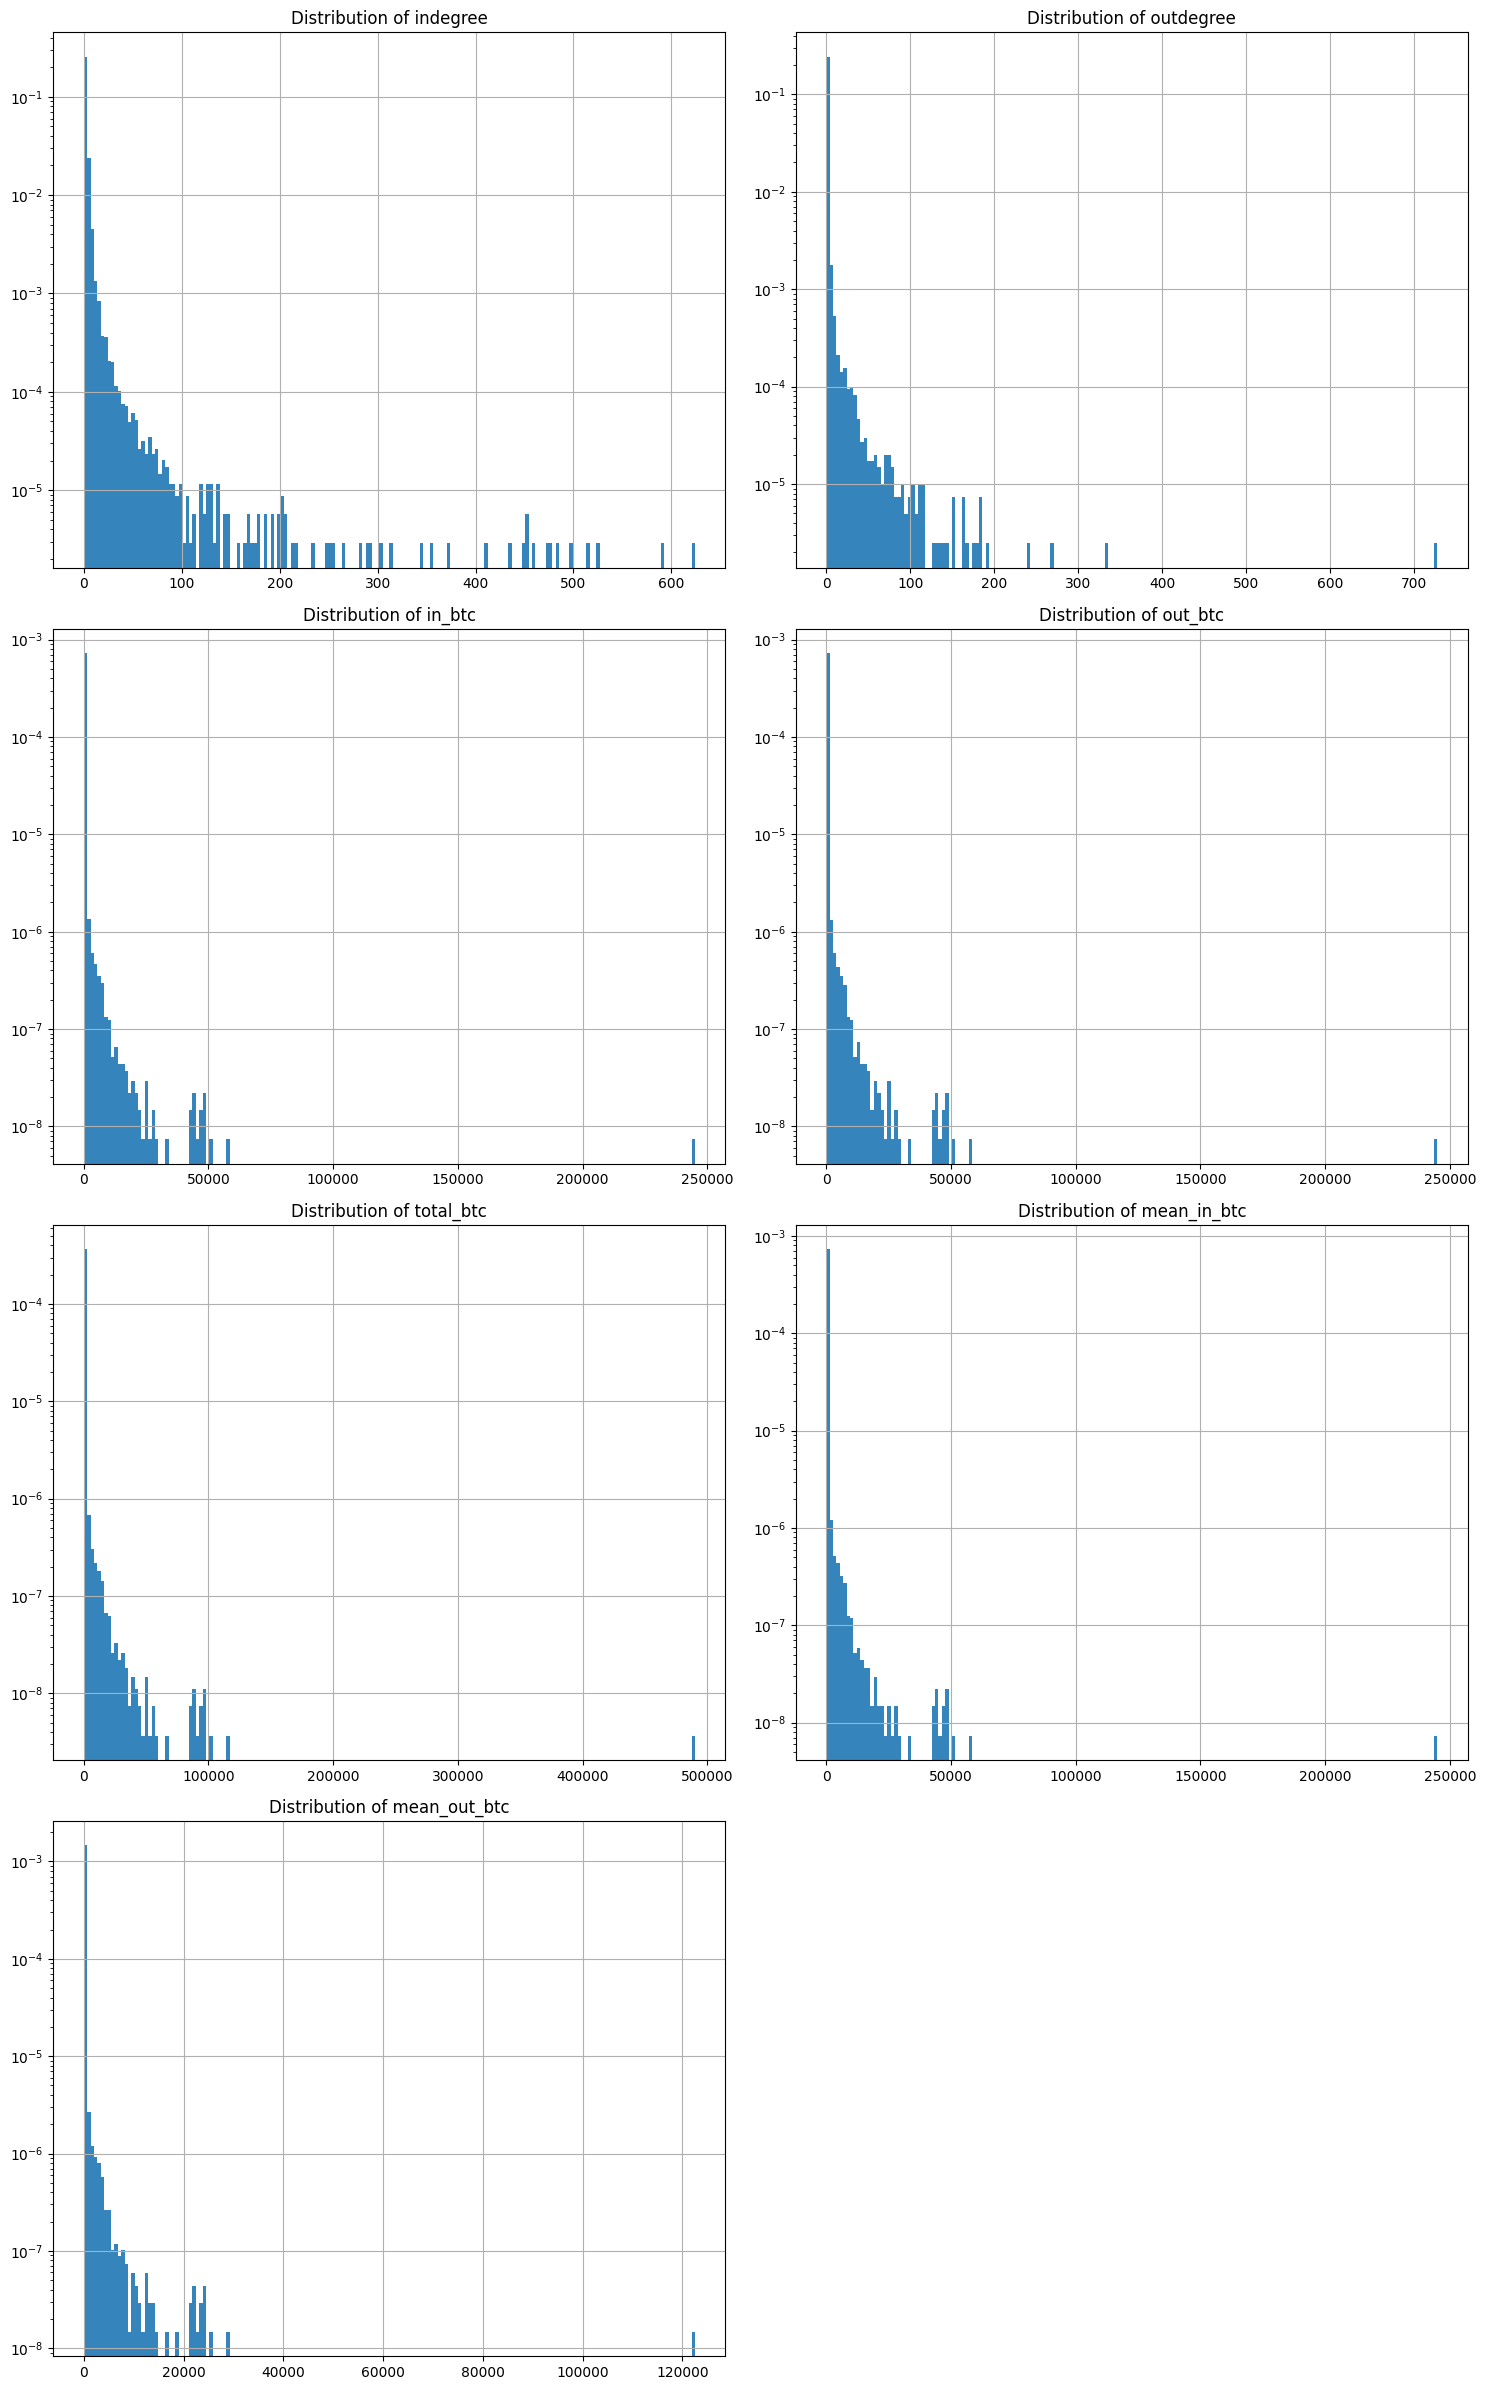

In [8]:
def histogram_plot(dataset_df, numeric_columns):
    # Only numeric columns are visualised
    dataset_df = dataset_df[numeric_columns]
    
    bins = 180  
    rows = (len(numeric_columns) + 1) // 2  
    fig, ax = plt.subplots(rows, 2, figsize=(15, 6 * rows))  
    ax = ax.flatten()  
    
    for c, column in enumerate(numeric_columns):
        ax[c].hist(dataset_df[column].dropna(), bins=bins, alpha=0.9, log=True, density=True)
        ax[c].set_title(f"Distribution of {column}")
        ax[c].grid()
    
    # Remove unused subplot 
    for i in range(c + 1, len(ax)):
        fig.delaxes(ax[i])
    
    plt.tight_layout()
    plt.show()

# Numeric columns to include
numeric_columns = [
    'indegree', 'outdegree', 'in_btc', 'out_btc', 
    'total_btc', 'mean_in_btc', 'mean_out_btc'
]

# Plot the histogram
histogram_plot(dataset_df, numeric_columns)

- Boxplot

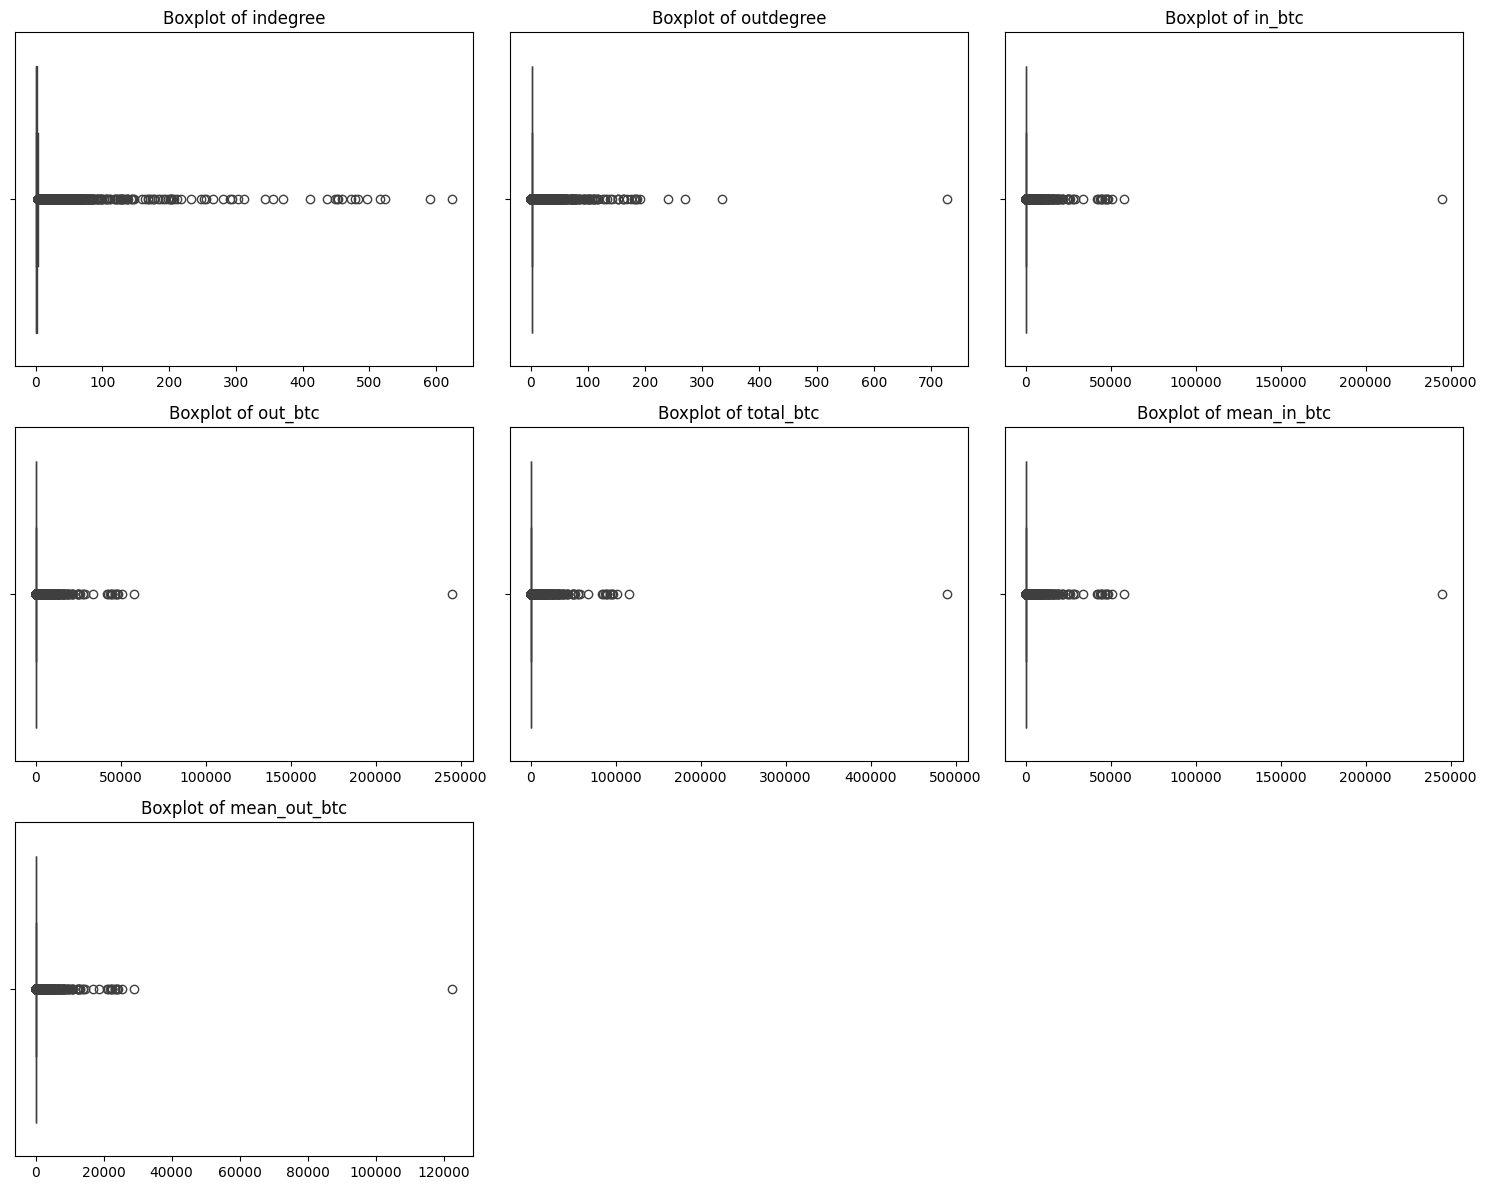

In [9]:
# Boxplots for numeric columns
num_col = ['indegree', 'outdegree', 'in_btc', 'out_btc', 
                   'total_btc', 'mean_in_btc', 'mean_out_btc']

plt.figure(figsize=(15, 12))

for i, column in enumerate(num_col, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=dataset_df, x=column)
    plt.title(f"Boxplot of {column}")
    plt.xlabel('')
plt.tight_layout()
plt.show()

- Bar Chart

Fraud vs non-fraud -> data imbalance

Text(0.5, 1.0, "Distribution of 'out_and_tx_malicious'")

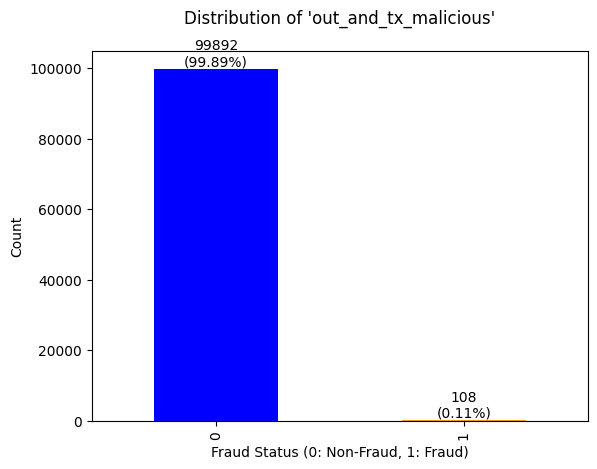

In [10]:
# Plot the bar chart
ax = dataset_df['out_and_tx_malicious'].value_counts().plot(kind='bar', color=['blue', 'orange'])

# Annotate the bars with counts and percentages
total = len(dataset_df)
for p in ax.patches:
    count = p.get_height()
    percentage = f"{(count / total) * 100:.2f}%"
    ax.annotate(f"{count}\n({percentage})", (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title("Distribution of 'out_and_tx_malicious'")
plt.xlabel("Fraud Status (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
ax.set_title("Distribution of 'out_and_tx_malicious'", pad=20)  

- Heat map (Correlationship)

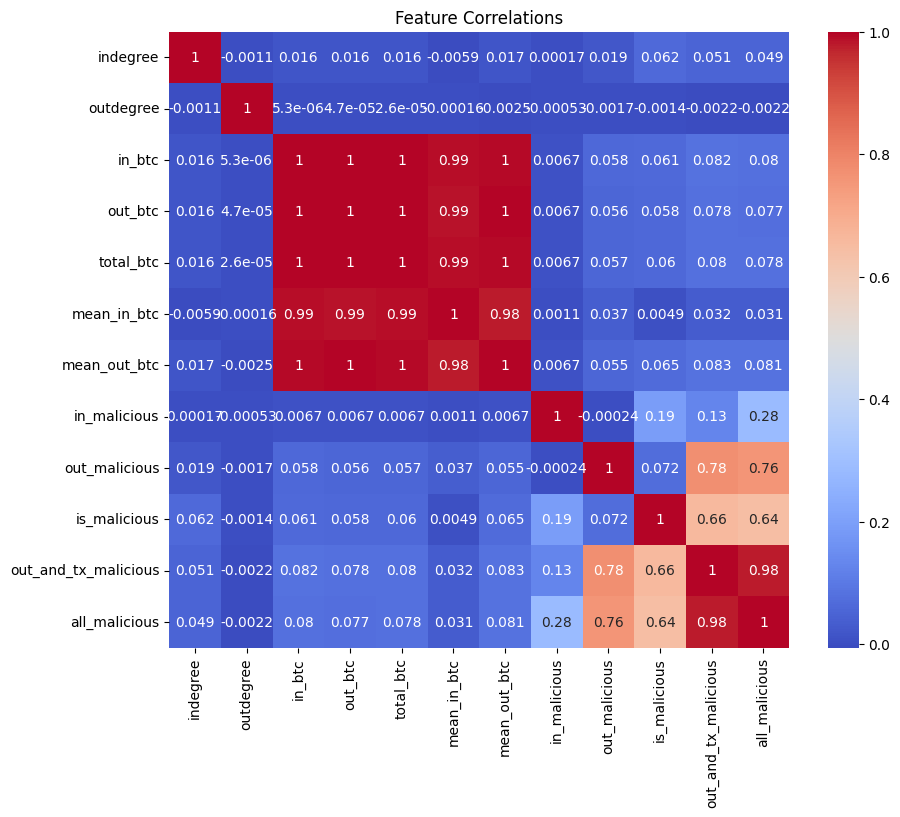

Fraud Stats:
        indegree  outdegree    in_btc   out_btc  total_btc  mean_in_btc  \
count   108.000    108.000   108.000   108.000    108.000      108.000   
mean     14.954      1.843  2759.192  2637.151   5396.343     1081.987   
std      51.410      0.598  5625.572  5519.474  11122.459     3580.844   
min       1.000      0.000     0.019     0.000      0.037        0.006   
25%       1.000      2.000    47.424    28.234     94.848       16.802   
50%       3.000      2.000   234.945   134.700    469.889       51.205   
75%       8.500      2.000  2669.565  2471.678   5190.682      476.462   
max     478.000      6.000 25000.620 25000.089  50000.630    25000.000   

       mean_out_btc  in_malicious  out_malicious  is_malicious  \
count       108.000       108.000        108.000       108.000   
mean       1400.859         0.037          0.602         0.435   
std        3092.982         0.190          0.492         0.498   
min           0.000         0.000          0.000       

In [11]:
# Correlation matrix (exclude non-numeric columns)
numeric_data = dataset_df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

# Feature differences
fraud_data = dataset_df[dataset_df['out_and_tx_malicious'] == 1]
normal_data = dataset_df[dataset_df['out_and_tx_malicious'] == 0]
print("Fraud Stats:\n", fraud_data.describe())
print("Normal Stats:\n", normal_data.describe())

# Data Pre-processing

- Analyse data type

In [12]:
print("\nData Types:\n\n", dataset_df.dtypes)


Data Types:

 tx_hash                  object
indegree                  int64
outdegree                 int64
in_btc                  float64
out_btc                 float64
total_btc               float64
mean_in_btc             float64
mean_out_btc            float64
in_malicious              int64
out_malicious             int64
is_malicious              int64
out_and_tx_malicious      int64
all_malicious             int64
dtype: object


In [5]:
# Convert specified columns to boolean datatype
boolean_column = ['in_malicious', 'out_malicious', 'is_malicious', 'out_and_tx_malicious', 'all_malicious']

# Remove columns that are not in the dataframe
boolean_column = [col for col in boolean_column if col in dataset_df.columns]

# Convert remaining columns to boolean datatype
dataset_df[boolean_column] = dataset_df[boolean_column].astype(bool)

print("\n Updated datatype:\n\n", dataset_df.dtypes)


 Updated datatype:

 tx_hash                  object
indegree                  int64
outdegree                 int64
in_btc                  float64
out_btc                 float64
total_btc               float64
mean_in_btc             float64
mean_out_btc            float64
in_malicious               bool
out_malicious              bool
is_malicious               bool
out_and_tx_malicious       bool
all_malicious              bool
dtype: object


- Analyse Missing Value

In [6]:
# Calculate the sum of missing values for each column
missing_values = dataset_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Check for missing values
if missing_values.empty:
    print("\nNo missing values in the dataset.")
else:
    print("\nMissing Values:\n", missing_values)


No missing values in the dataset.


- Check for data duplication

In [7]:
# Check for duplicate rows
before_duplicate_check = dataset_df.duplicated().sum()
print(f"\nNumber of Duplicate Rows Before Removal: {before_duplicate_check}")

# Remove duplicate rows
dataset_df.drop_duplicates(inplace=True)

# Check duplicates after removal
after_duplicate_check = dataset_df.duplicated().sum()
print(f"\nNumber of Duplicate Rows After Removal: {after_duplicate_check}")


Number of Duplicate Rows Before Removal: 0

Number of Duplicate Rows After Removal: 0


# Feature Selection

-  Dropping Irrelevant or Redundant Columns


In [8]:
drop_cols = ['tx_hash', 'is_malicious', 'all_malicious', 'mean_in_btc', 'mean_out_btc','in_malicious']
dataset_df.drop(columns=drop_cols, inplace=True)

In [9]:
dataset_df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   indegree              100000 non-null  int64  
 1   outdegree             100000 non-null  int64  
 2   in_btc                100000 non-null  float64
 3   out_btc               100000 non-null  float64
 4   total_btc             100000 non-null  float64
 5   out_malicious         100000 non-null  bool   
 6   out_and_tx_malicious  100000 non-null  bool   
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.0 MB


# Data Splitting

In [10]:
from sklearn.model_selection import train_test_split

X = dataset_df.drop('out_and_tx_malicious', axis=1)
y = dataset_df['out_and_tx_malicious']

# Original dataset split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# ################################
# # Combine the testing set dataset with the target variable
# testing_set = X_test.copy()
# testing_set['out_and_tx_malicious'] = y_test.values

# # Save the combined testing set to a CSV file
# testing_set.to_csv('testing_set.csv', index=False)
# ################################

# further split the training data into train (85%) and validation (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

# View the result after splitting
print("Data Splitting Completed:\n")

print(f"Train set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Data Splitting Completed:

Train set: (72000, 6)
Validation set: (8000, 6)
Test set: (20000, 6)


# Feature Scaling: Logarithmic Transformation 

Applying Log Transformation to Handle Right-Skewed Data


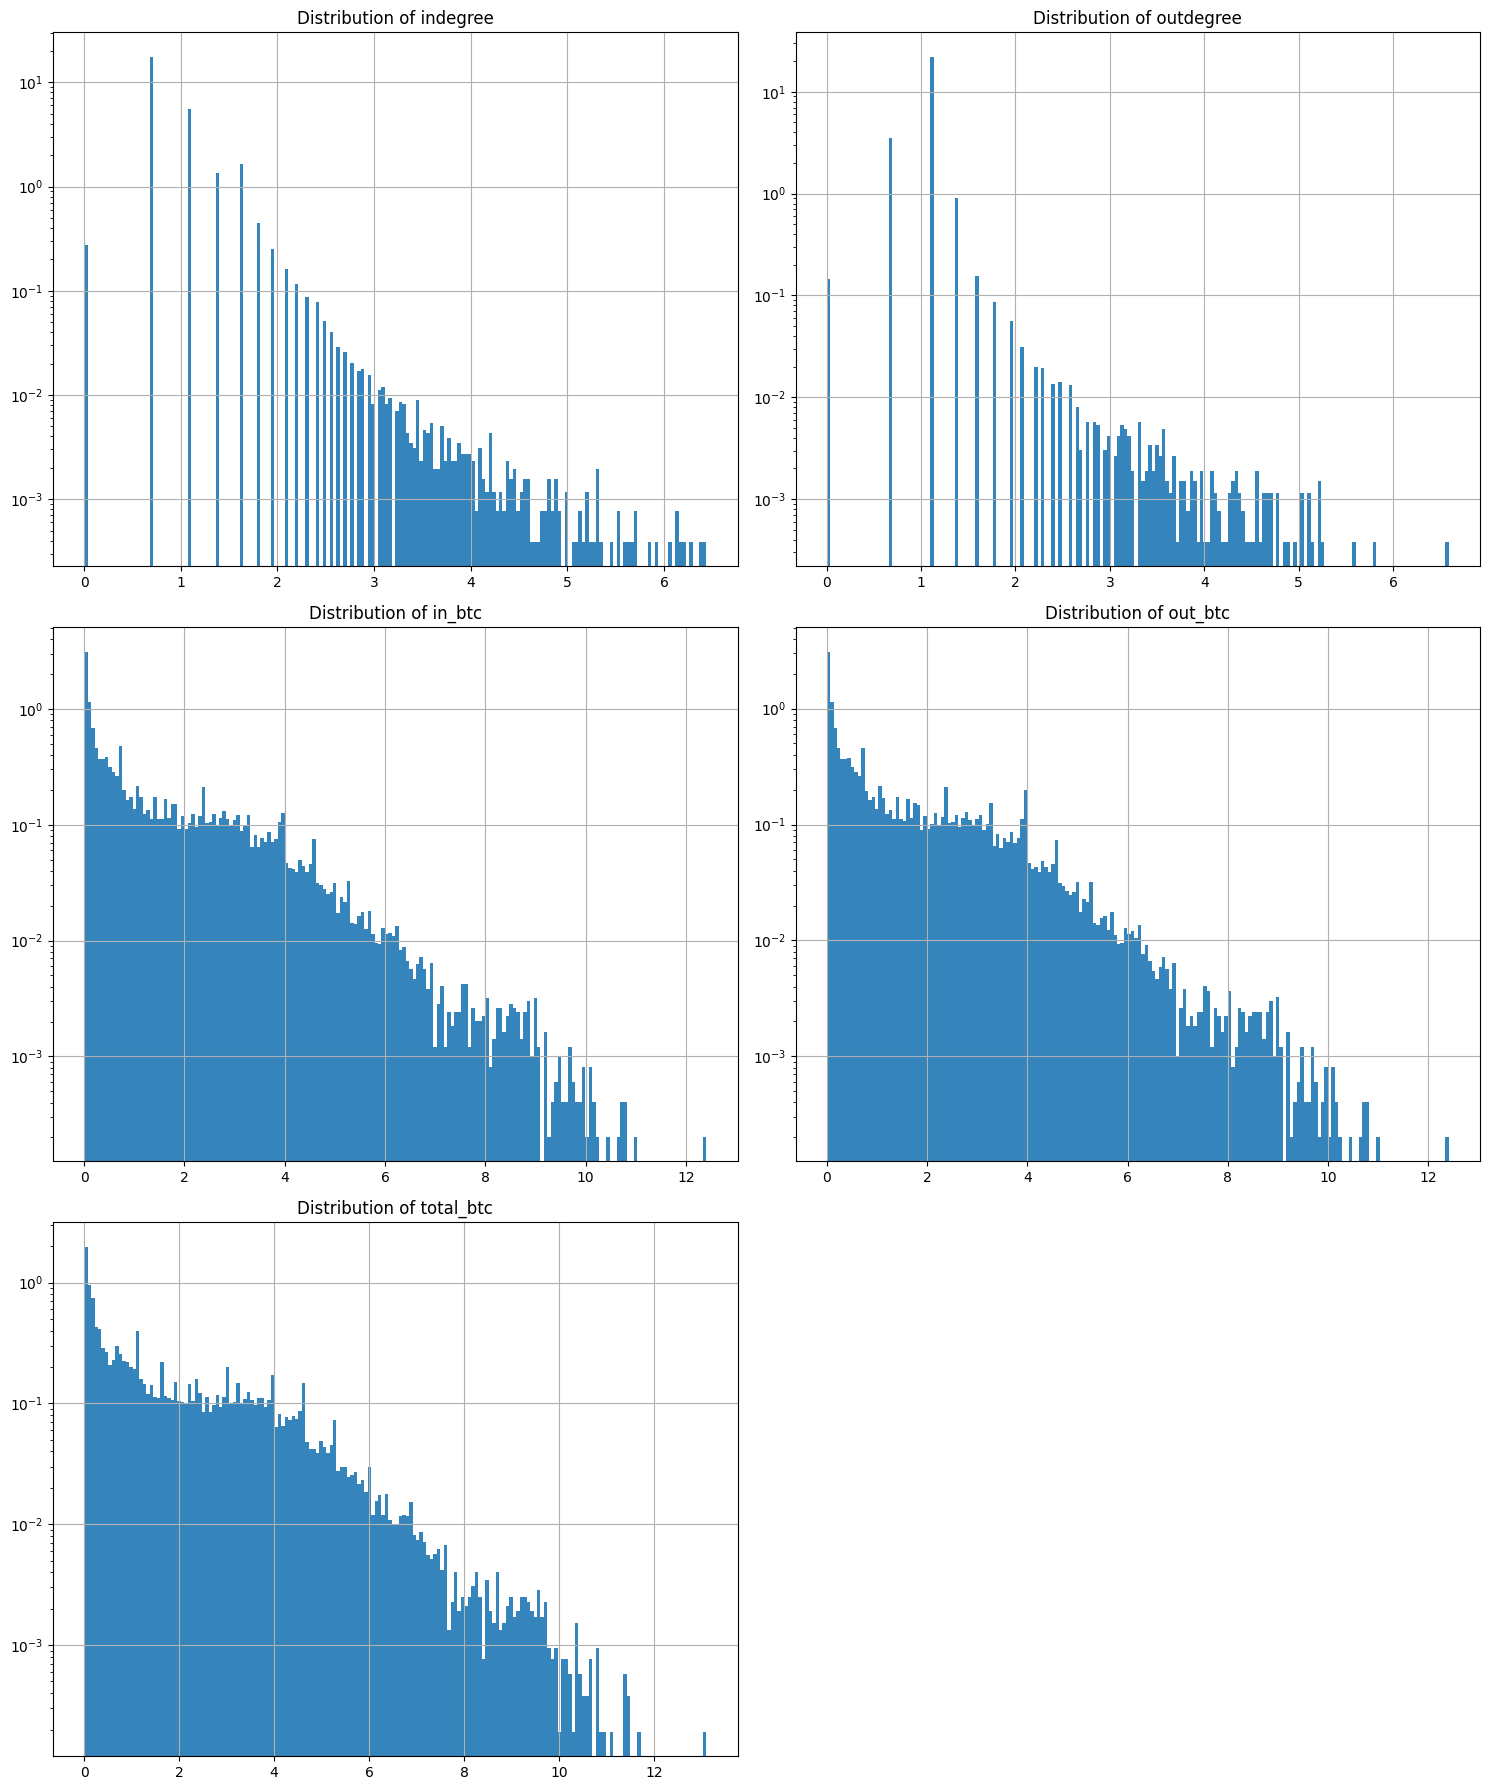

In [21]:
X_train_log = X_train.copy()
X_val_log = X_val.copy()
X_test_log = X_test.copy()

log_features = ['indegree', 'outdegree', 'in_btc', 'out_btc','total_btc']

for feature in log_features:
    X_train_log[feature] = np.log1p(X_train_log[feature])  # log1p avoids log(0)
    X_val_log[feature] = np.log1p(X_val_log[feature])
    X_test_log[feature] = np.log1p(X_test_log[feature])

# Histogram Visualization
histogram_plot(X_train_log, log_features)


# Feature Engineer

In [ ]:
# Feature Engineering Function
def add_features(df):
    df['out_malicious_to_total_btc'] = df['out_malicious'] / (df['total_btc'] + 1e-6)
    df['log_total_btc'] = np.log1p(df['total_btc'])
    df['out_malicious_in_btc_interaction'] = df['out_malicious'] * df['in_btc']
    df['net_btc_flow'] = df['in_btc'] - df['out_btc']
    return df

# Apply feature engineering to Train, Validation, and Test sets
X_train_fe = add_features(X_train)
X_val_fe = add_features(X_val)
X_test_fe = add_features(X_test)

# Select the final set of features
selected_features = [
    'in_btc', 'out_btc', 'total_btc', 'out_malicious','indegree','outdegree',
    'out_malicious_to_total_btc', 'log_total_btc',
    'out_malicious_in_btc_interaction', 'net_btc_flow'
]

X_train_final = X_train_fe[selected_features]
X_val_final = X_val_fe[selected_features]
X_test_final = X_test_fe[selected_features]

print("Feature Engineering Complete")

#After feature engineering and selection
X_test_final = X_test_fe[selected_features]
X_test_final.to_csv('X_test.csv', index=False)  # Overwrite the original save
pd.DataFrame({'out_and_tx_malicious': y_test}).to_csv('y_test.csv', index=False)


Feature Engineering Complete


# Data balancing -smote

In [23]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy=0.01, random_state=42)  
X_train_smote, y_train_smote = smote.fit_resample(X_train_log, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
out_and_tx_malicious
False    71922
True       719
Name: count, dtype: int64


# Feature Scaling: Robust Scaling

To Mitigate the Influence of Outliers

In [32]:
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Ensure the scaler is fitted on the same set of features as those in X_train_final
X_train_scaled = scaler.fit_transform(X_train_final)

# Transform Validation and Test sets using the same scaler
X_val_scaled = scaler.transform(X_val_final)
X_test_scaled = scaler.transform(X_test_final)

# Convert back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_final.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val_final.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)

# View the first few rows of the dataset before and after scaling
print("Before Scaling:")
print(X_train_final.describe())

print("\nAfter Scaling:")
print(X_train_scaled_df.describe())

Before Scaling:
          in_btc    out_btc  total_btc  indegree  outdegree  \
count  72000.000  72000.000  72000.000 72000.000  72000.000   
mean      53.608     53.301    106.909     2.171      2.144   
std     1149.615   1147.943   2297.173     8.070      4.790   
min        0.000      0.000      0.000     0.000      0.000   
25%        0.100      0.099      0.205     1.000      2.000   
50%        0.916      0.945      1.946     1.000      2.000   
75%        8.510      9.039     18.325     2.000      2.000   
max   245000.000 245000.000 490000.000   624.000    728.000   

       out_malicious_to_total_btc  log_total_btc  \
count                   72000.000      72000.000   
mean                        0.001          1.720   
std                         0.124          1.795   
min                         0.000          0.000   
25%                         0.000          0.187   
50%                         0.000          1.080   
75%                         0.000          2.961   
